# applying pca without any scilit learn librarry

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [4]:
plt.style.use('ggplot')
plt.rcParams["figure.figsize"]=[12,8]

In [5]:
#PCA is used to reduce the dimension of the data set which has a high dimension it reduces it low low dimension

In [6]:
iris=pd.read_csv('C:\\Users\\Admin\\Desktop\\Skill Circle\\dataset\\Iris.csv')

In [7]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [9]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


# task 3: Visualize the data

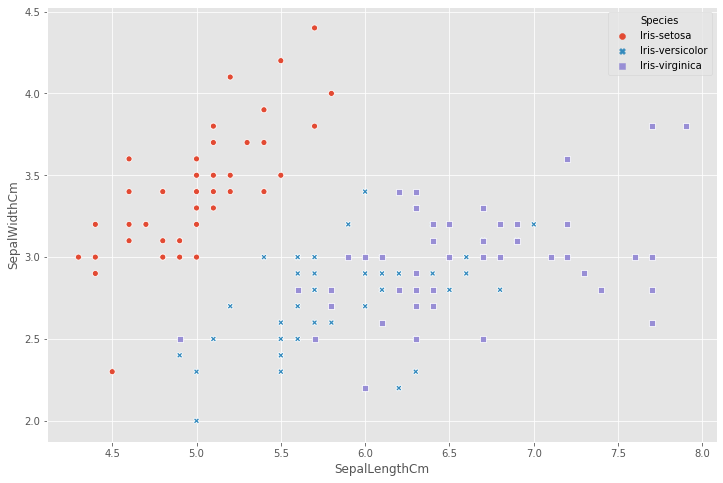

In [10]:
sns.scatterplot(x=iris.SepalLengthCm,y=iris.SepalWidthCm, hue=iris.Species, style=iris.Species);

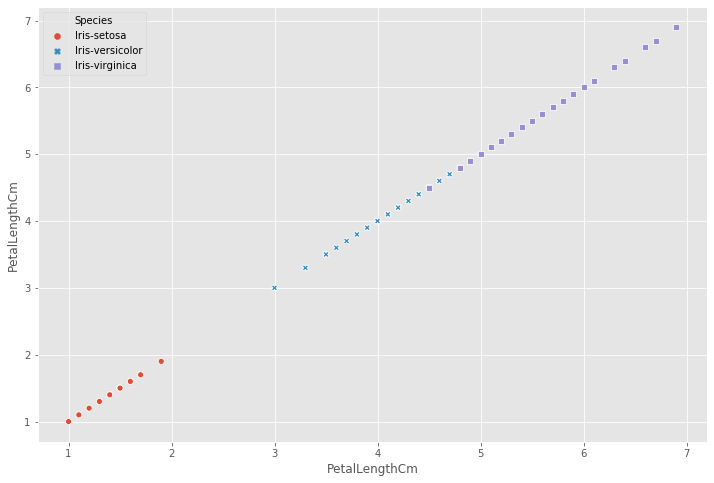

In [11]:
sns.scatterplot(x=iris.PetalLengthCm,y=iris.PetalLengthCm,hue=iris.Species,style=iris.Species)

# Data standardization

In [12]:
X=iris.iloc[:,0:4].values
y=iris['Species'].values

In [13]:
from sklearn.preprocessing import StandardScaler

X=StandardScaler().fit_transform(X)

# Compute The eigen value and eigen vector

In [14]:
covariance_matrix=np.cov(X.T)
print(covariance_matrix)

[[ 1.00671141  0.72148618 -0.40039813  0.8886718 ]
 [ 0.72148618  1.00671141 -0.11010327  0.87760486]
 [-0.40039813 -0.11010327  1.00671141 -0.42333835]
 [ 0.8886718   0.87760486 -0.42333835  1.00671141]]


In [15]:
# Eigen Composition
eigen_values, eigen_vector=np.linalg.eig(covariance_matrix)
print(eigen_values)

[2.83122907 0.04725055 0.22729518 0.92107083]


In [16]:
print(eigen_vector)

[[ 0.55318314  0.31153594 -0.77256222 -0.00902118]
 [ 0.51774664  0.48025478  0.56930389 -0.42093567]
 [-0.28847469 -0.16889872 -0.2641027  -0.90471285]
 [ 0.58541369 -0.80235523  0.09638701 -0.06501105]]


# Singular value Decomposition


In [17]:
eigen_svd,s,v=np.linalg.svd(X.T)

In [18]:
eigen_svd

array([[-0.55318314,  0.00902118,  0.77256222, -0.31153594],
       [-0.51774664,  0.42093567, -0.56930389, -0.48025478],
       [ 0.28847469,  0.90471285,  0.2641027 ,  0.16889872],
       [-0.58541369,  0.06501105, -0.09638701,  0.80235523]])

# pick principal componen analysis on the basis of discussion

In [19]:
for val in eigen_values:
    print(val)

2.83122907497383
0.04725054797568647
0.2272951817317965
0.9210708329025815


In [20]:
variance_explained=[(i/sum(eigen_values))*100 for i in eigen_values]
variance_explained

[70.30885536185006, 1.1733886080628801, 5.644497013006276, 22.873259017080763]

In [21]:
cumulative_variance_explained=np.cumsum(variance_explained)
cumulative_variance_explained

array([ 70.30885536,  71.48224397,  77.12674098, 100.        ])

Text(0.5, 1.0, 'no of components   vs cumulative_variance_explained')

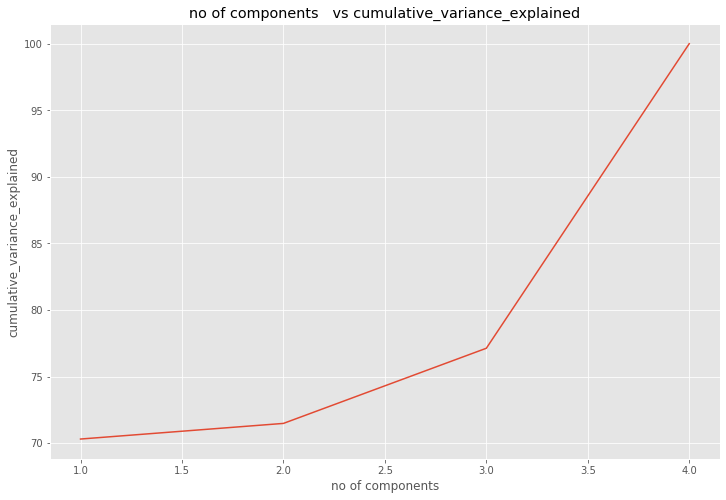

In [22]:
sns.lineplot(x=[1,2,3,4],y=cumulative_variance_explained)
plt.xlabel('no of components')
plt.ylabel('cumulative_variance_explained')
plt.title('no of components   vs cumulative_variance_explained')

# project data on to lower dimensionality

In [24]:
eigen_vector

array([[ 0.55318314,  0.31153594, -0.77256222, -0.00902118],
       [ 0.51774664,  0.48025478,  0.56930389, -0.42093567],
       [-0.28847469, -0.16889872, -0.2641027 , -0.90471285],
       [ 0.58541369, -0.80235523,  0.09638701, -0.06501105]])

In [29]:
projection_matric=(eigen_vector.T[:][:])[:2].T

In [35]:
print("Projection matrix:\n", projection_matric)

Projection matrix:
 [[ 0.55318314  0.31153594]
 [ 0.51774664  0.48025478]
 [-0.28847469 -0.16889872]
 [ 0.58541369 -0.80235523]]


In [36]:
 X_pca=X.dot(projection_matric)

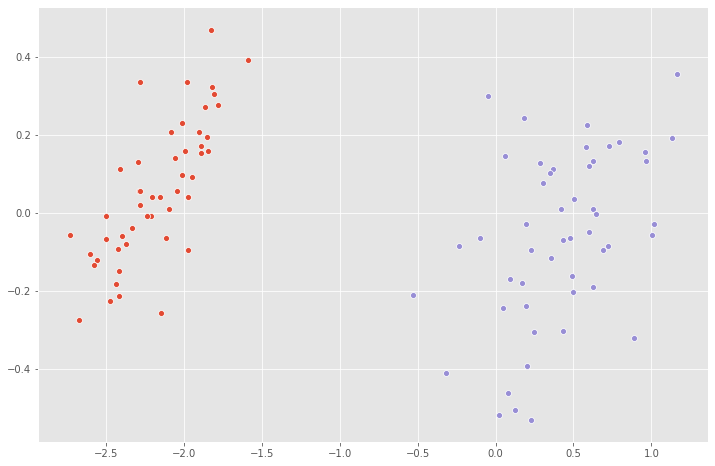

In [39]:
for species in ('Iris-setosa','Iris-verginica','Iris-versicolor'):
    sns.scatterplot(X_pca[y==species,0],
                    X_pca[y==species,1])